## Final Project Submission

Please fill out:
* Student name: Tai Ngoc Bui
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


## Aviation Data Exploratory Analysis

### 1. Project Goal

The goal of this project is to interpret aviation data from the National Transportation Safety Board to recommend the safest aircraft to support the company's investment in operating airplances in commercial and private enterprises.

### 2. Data Source 

This aviation dataset is from the National Transportation Safety Board, including accident aviation data from 1962 to 2023 about civil aviation accidents about civil aviation accidents and selected incidents in the United States and international waters.

### 3. Data Exploration and Safety Measure

The table has 31 columns and 90348 data points. I decided to only include airplane accident data and most of my analysis only include incidents occurred after 2000. The reason I limit my dataset including only data after 2000 is due to the changes of technology innovation in the aviation industry. With more current data, it is guaranteed that my analysis will only consider the current models and makers in the industry.

The major mesurement for me to determine the safety of a certain maker, a model or a type of engine is its ratio of fatality accidents over all the accidents it incurred in this dataset. The reason I use ratio rather than the raw data itself is due to a certain bias factor in the data. For instance, for not-very popular maker or model, it will mostly have low number of accidents; thus, its fatality injuries rate is also very low or even non-exist. However, due to its small sample, it is not safe to conclude that certain maker or model is safer than those with higher fatality but also with much more popularity in the industry. With higher popularity, a maker's products will be used by more airlines and customers; thus, it is also faced with higher fatality rate and accidents occurred.

### 1. Load and Explore Data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data and check first five rows
df = pd.read_csv('data/Aviation_data.csv')
df.head()

C:\Users\taing\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#check what type of columns available
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

I realize there are several columns that not needed for my analysis. Thus, I decided to drop them to partly simplify the dataframe.

In [4]:
#drop unnecessary columns
drop_columns = ['Accident.Number', 'Latitude', 'Longitude', 'Airport.Code','Airport.Name','Registration.Number',
               'FAR.Description','Schedule','Publication.Date']
df.drop(drop_columns, axis = 1, inplace = True)

In [5]:
#have a glimpse at the datatype of each columns as well as number of Nan values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Injury.Severity         87889 non-null  object 
 6   Aircraft.damage         85695 non-null  object 
 7   Aircraft.Category       32287 non-null  object 
 8   Make                    88826 non-null  object 
 9   Model                   88797 non-null  object 
 10  Amateur.Built           88787 non-null  object 
 11  Number.of.Engines       82805 non-null  float64
 12  Engine.Type             81812 non-null  object 
 13  Purpose.of.flight       82697 non-null  object 
 14  Air.carrier             16648 non-null

### 2. Clean Data

Some columns contains combined information such as Location and Injury Severity. I decided to split these columns so I can improve the detail of the dataframe.

In [6]:
#split location into city and state columns
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
#split injury.severity and only keep non numeric values
df['Injury Severity'] = df['Injury.Severity'].str.split('(').str[0]
df.drop(['Location','Injury.Severity'], axis = 1, inplace = True)

In the Investigation Type column, there are cells with date info which needed to be excluded as those cells associated with blank rows.

In [7]:
#only keep those with non-date in Investigation.Type column
df = df[df['Investigation.Type'].str.lower().str.contains('cident')]

As the Event.Date are of string data type, I decide to convert them all to date type and create a new column hosting year of the event

In [8]:
#Convert Event.Date into datetime type and create another column to store event year
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Event Year'] = df['Event.Date'].dt.year

Now, I need to find a way to fix the NaN problems as there is a lot of blank cells. First, with numeric columns, I decide to fill NaN values with zero instead of any other statistical measure. The reason is that using a mean or median may cause significant bias given this data set recording fatalities of aviation accidents. Knowing the probabilities of aviation accident is low compared to the number of flights around the world, it is safe to assume zero fatalities would work as a placeholder for numeric columns' NaN values. On the other hand, many categorical columns use "Unknown" as a placeholder for no-info. Therefore, I will fill "Unknown" into NaN values.

In [9]:
#Check the total Nan values in each column
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Event.Date                    0
Country                     226
Aircraft.damage            3194
Aircraft.Category         56602
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
City                         52
State                       559
Injury Severity            1000
Event Year                    0
dtype: int64

In [10]:
#with numeric columns, I fill zero to replace Nan values
num_columns = df.select_dtypes(include=['float64']).columns
df[num_columns] = df[num_columns].fillna(0)
#with the rest of the columns, I use 'Unknown' as the placeholder for Nan values
df = df.fillna('Unknown')

In [11]:
#Checking the number of Nan values in dataframe after cleaning
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Event.Date                0
Country                   0
Aircraft.damage           0
Aircraft.Category         0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
City                      0
State                     0
Injury Severity           0
Event Year                0
dtype: int64

I decide to filter out Amateur-built aircraft as our company should only invest in the public brand which had been proven overtime. Moreover, as company wants to focus on airplane investment for commercial and private enterprises, it is best to exclude other aircraft categories.

The Make columns show different aircraft makers. However, many of those names, while pointing to the same brand, but having different format such as capitalize vs. title. I decided to make all Make names as title format

In [12]:
#filter out amateur built and only keep airplane accident data
df = df[df['Amateur.Built'] == 'No']
df = df[df['Aircraft.Category'] == 'Airplane']
#format all Maker as title format
df['Make'] = df['Make'].str.title()

It is time to start analyzing the data in details.

### 3. Data Exploratory

First, let's see if there is more or less fatal airplane accidents as time progress. We will need to build a time line series.

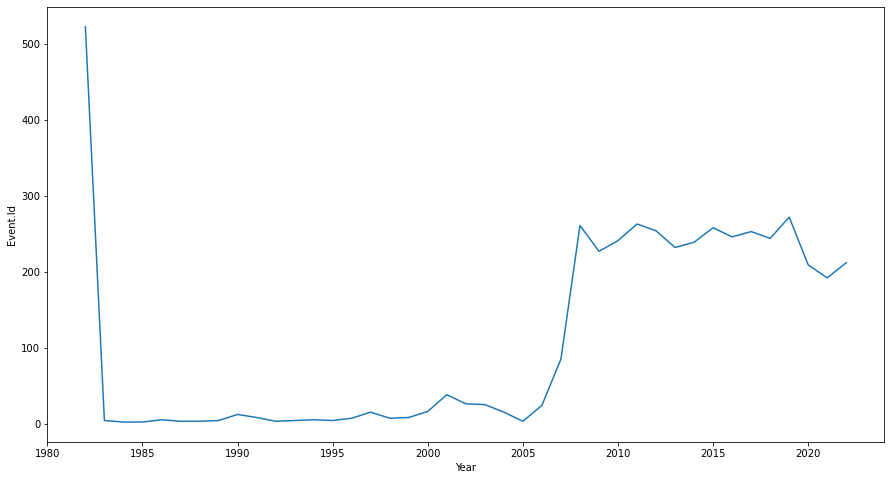

In [13]:
df['Year'] = df['Event.Date'].dt.year
fatal_accidents_per_year = df[df['Injury Severity'] == 'Fatal'].groupby(['Year'], as_index = False)['Event.Id'].count()
plt.subplots(figsize = (15,8))
sns.lineplot(x = 'Year', y = 'Event.Id', data = fatal_accidents_per_year);

Looks like the number of fatal airplane accidents increase significantly after 2005. 1982 would be considered as an outlier in this sample. This can be considered as a result of air traffic booming the past 2 decades. As technology innovates and economic conditions improve, it is much easier for general public to travel by air. However, with the increase of air traffic, it also leads to a significant increase of fatal air accidents. 

Second, let's look at which countries have the most air accidents? was it due to low economic growth and innovation (third world countries) or maybe there are other factors. Here we look at top 10 countries that have the most air accidents

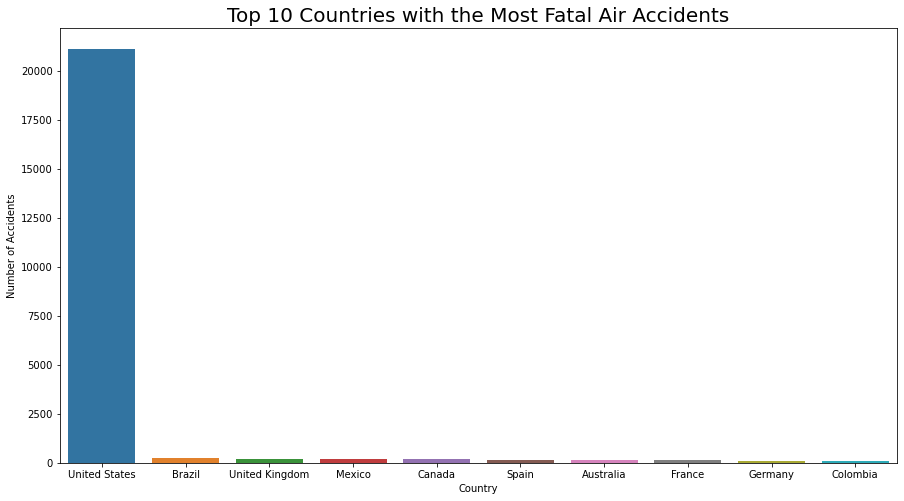

In [14]:
country_df = df[df['Country'] != 'Unknown']['Country'].value_counts()[:10]
plt.subplots(figsize = (15,8))
sns.barplot(x = country_df.index , y = country_df.values)
plt.xlabel('Country')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Countries with the Most Fatal Air Accidents', size = 20);


It is safe to eliminate the assumption that low economic growth and lack of innovation are the causes of high air accidents. The chart shows that first world countries make up 7 spots in the top 10 most air accident countries around the world. Meanwhile, the U.S. ranked highest with the most air accidents, more than the total sum of all air accidents of the other 9 countries. While the U.S. is known with the most developed air infrastructure, it also records the highest number of air accidents.

Third, let's look at those makers that only have minor injuries or uninjured since the year 2000

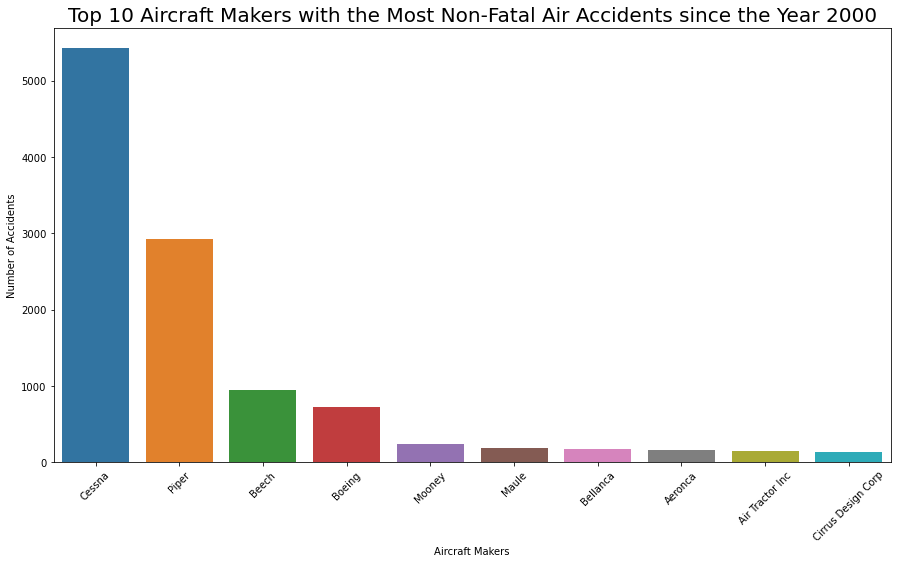

In [15]:
non_fatal = df[((df['Total.Minor.Injuries'] + df['Total.Uninjured']) > 0) & (df['Event Year'] > 2000)]['Make'].value_counts()[:10]
plt.subplots(figsize = (15,8))
sns.barplot(x = non_fatal.index , y = non_fatal.values)
plt.xlabel('Aircraft Makers')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Aircraft Makers with the Most Non-Fatal Air Accidents since the Year 2000', size = 20)
plt.xticks(rotation = 45);


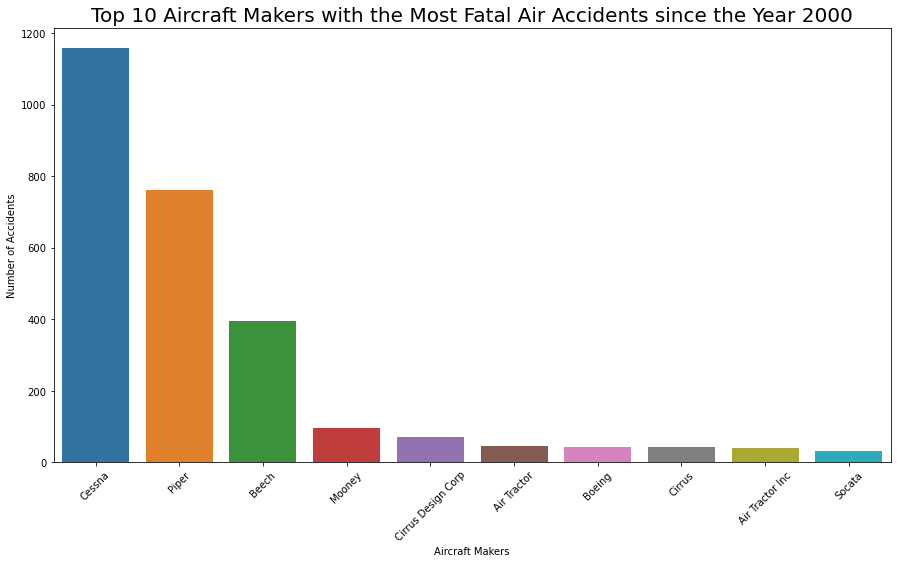

In [16]:
fatal = df[(df['Total.Fatal.Injuries'] > 0) & (df['Event Year'] > 2000)]['Make'].value_counts()[:10]
plt.subplots(figsize = (15,8))
sns.barplot(x = fatal.index , y = fatal.values)
plt.xlabel('Aircraft Makers')
plt.ylabel('Number of Accidents')
plt.title('Top 10 Aircraft Makers with the Most Fatal Air Accidents since the Year 2000', size = 20)
plt.xticks(rotation = 45);


#### First Recommendation

Some may think I should not recommend any of the makers listed in the top fatal air accidents. However, I believe there is a certain bias using the chart for selection. For instance, some unknown aircraft makers may have very low number of fatal accidents but that does not mean their products deemed to be industry standard safe. The reason for their low fatal injuries may due to their low number of products sold or being used around the world. On the other hand, Boeing would ranked high in fatal list, but that does not mean Boeing's aircraft is unsafe for flights. This would be the result of Boeing aircrafts are being flied around the world by various different airlines.

To reduce the bias as stated above, I use a ratio between the number of fatal/serious injuries and the total accident cases for each maker to select the safest aircraft makers and their models to recommend to my clients. Furthermore, to exclude the smaller-size aircraft makers, I use a threshold of 200 accidents to only retain the popular makers (meaning any makers have less than 100 accidents should not be included). The result will only look at those makers that have less than 20% fatal/serious injuries rate out of all their total accidents.

In [17]:
numerator = df[(df['Total.Fatal.Injuries'] > 0) | (df['Total.Serious.Injuries'] > 0)].groupby('Make').count()
denominator = df.groupby(['Make']).count()
df_ratio = pd.merge(numerator, denominator, left_index=True, right_index=True)
df_ratio = df_ratio[['Event.Date_x', 'Event.Date_y']]
df_ratio['Fatal ratio'] = round(df_ratio['Event.Date_x'] / df_ratio['Event.Date_y'],2)
df_ratio.loc[(df_ratio['Fatal ratio'] < 0.2) & (df_ratio['Event.Date_y'] > 100)]

,Event.Date_x,Event.Date_y,Fatal ratio
Make,,,
Airbus,33,243,0.14
Boeing,196,1309,0.15
Mcdonnell Douglas,22,113,0.19


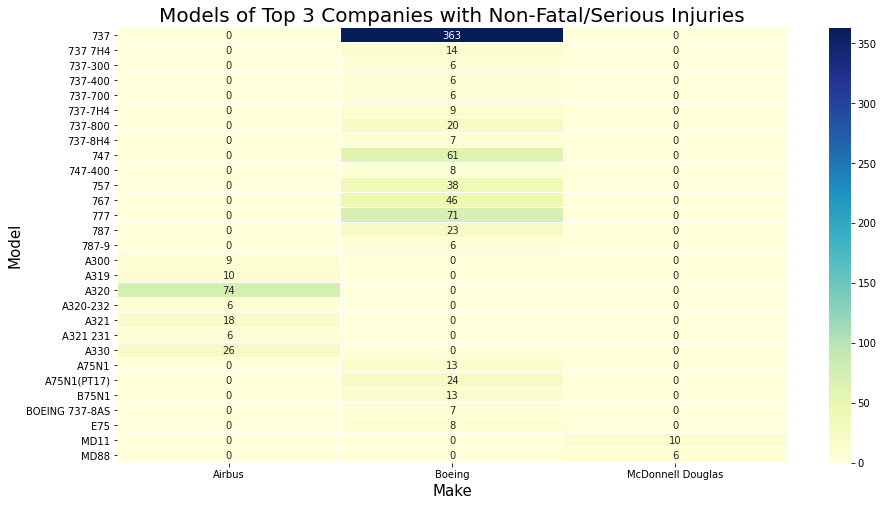

In [18]:
df1 = df[(df['Total.Fatal.Injuries'] == 0) & (df['Total.Serious.Injuries'] == 0)]
df1 = df1.loc[df1['Make'].str.lower().str.contains('|'.join(['airbus','boeing','mcdonnell douglas']))]
df1 = df1[df1['Event Year'] > 2000]
df1.loc[df1['Make'].str.lower().str.contains('boeing'), 'Make'] = 'Boeing'
df1.loc[df1['Make'].str.lower().str.contains('airbus'), 'Make'] = 'Airbus'
df1.loc[df1['Make'].str.lower().str.contains('mcdonnell douglas'), 'Make'] = 'McDonnell Douglas'
tb = pd.pivot_table(df1, index=['Model'], columns=['Make'], values='Event.Date', aggfunc=np.count_nonzero, fill_value=0)
tb = tb[tb.values > 5]
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(tb, annot=True, fmt="d", linewidths=.1, ax=ax, linecolor='white', cmap='YlGnBu')
plt.xlabel("Make", size=15)
plt.ylabel("Model", size=15)
plt.title("Models of Top 3 Companies with Non-Fatal/Serious Injuries", size=20);

The heatmap shows the number of non-fatal accidents involved by the top 3 aircraft makers in my list and their models respectively (only include cases after 2000 - if the model is too old, it should not have good technological upgrade). My first recommendation to the stakeholders is to pick any model in this list. The high number of non-fatal accidents for Boeing 737 is mostly due to the fact that it is the most popular plane sold around the world, operated by over 5000 airlines.

#### Second Recommendation

After having a look at the makers and their models, it is also crucial to analyze what is the safest engines out there.

C:\Users\taing\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


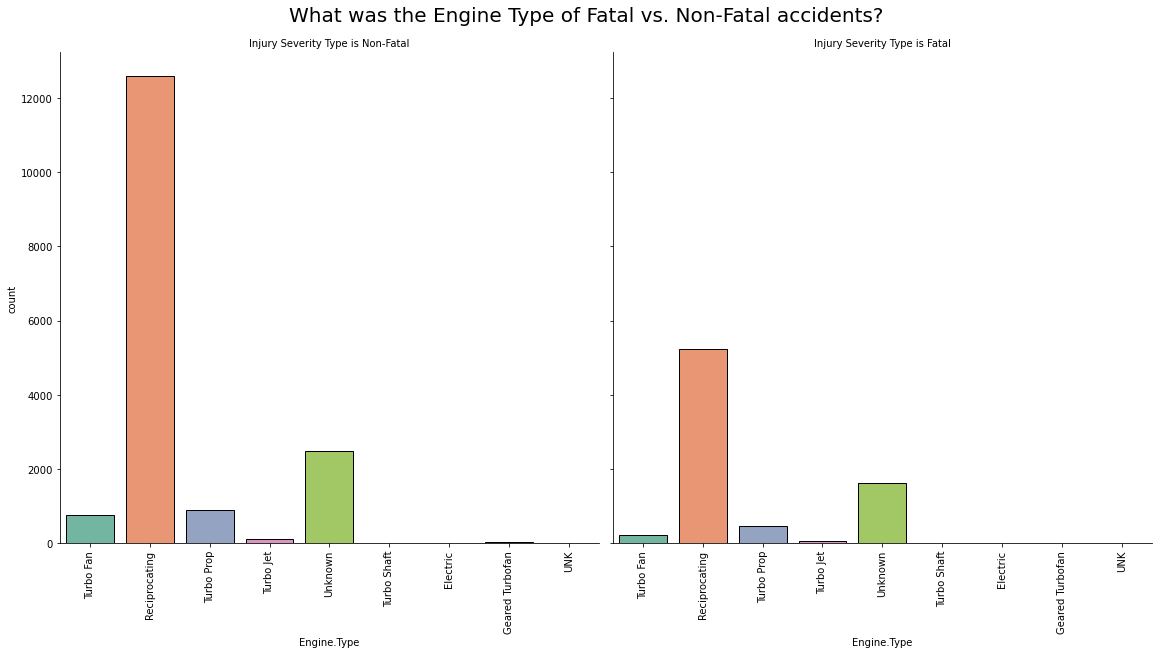

In [25]:
df.loc[(df['Total.Fatal.Injuries']  + df['Total.Serious.Injuries'] > 0), 'Fatal/Serious'] = 'Fatal'
df.loc[df['Fatal/Serious'].isna(), 'Fatal/Serious'] = 'Non-Fatal'
cplot = sns.catplot(x="Engine.Type", col="Fatal/Serious", kind="count", col_wrap=2,
            data=df[df['Fatal/Serious'].isin(['Fatal','Non-Fatal'])], height=4, size= 8,
                 legend_out=True, palette="Set2", edgecolor=(0,0,0));
cplot.set_xticklabels(rotation=90)
cplot.fig.suptitle("What was the Engine Type of Fatal vs. Non-Fatal accidents?", size=20)
cplot.fig.subplots_adjust(top=.9)
cplot.set_titles("Injury Severity Type is {col_name}");

Given Reciprocating is the engine with both most fatal and non-fatal accidents. I realize this chart cannot give us the answer to the safest engine. The high ranking for Reciprocating in both cases show that Reciprocating is the most common engine out there. As a result, I will use the same ratio method I used earlier with Maker and Model.

In [28]:
numerator = df[(df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']) > 0].groupby('Engine.Type').count()
denominator = df.groupby(['Engine.Type']).count()
df_ratio = pd.merge(numerator, denominator, left_index=True, right_index=True)
df_ratio = df_ratio[['Event.Date_x', 'Event.Date_y']]
df_ratio['Fatal ratio'] = round(df_ratio['Event.Date_x'] / df_ratio['Event.Date_y'],2)
df_ratio.sort_values(by = ['Fatal ratio'], ascending = True)

,Event.Date_x,Event.Date_y,Fatal ratio
Engine.Type,,,
Turbo Shaft,1,11,0.09
Turbo Fan,204,967,0.21
Reciprocating,5240,17846,0.29
Turbo Prop,456,1332,0.34
Turbo Jet,53,153,0.35
Unknown,1604,4090,0.39


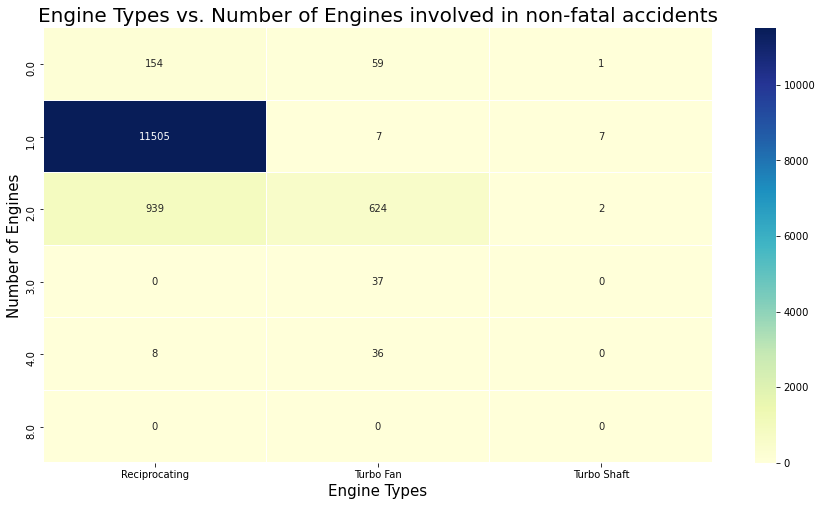

In [30]:
df2 = df[(df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries']) == 0]
tb = pd.pivot_table(df2[~df2['Engine.Type'].isin(['UNK','Unknown'])], index=['Number.of.Engines'], columns=['Engine.Type'], values='Event.Date', aggfunc=np.count_nonzero, fill_value=0)
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(tb[['Reciprocating','Turbo Fan','Turbo Shaft']], annot=True, fmt="d", linewidths=.1, ax=ax, linecolor='white', cmap='YlGnBu')
plt.xlabel("Engine Types", size=15)
plt.ylabel("Number of Engines", size=15)
plt.title("Engine Types vs. Number of Engines involved in non-fatal accidents", size=20);

Here, we can see the Turbo Fan, Turbo Shaft and Reciprocating are the top 3 safest engines. However, Turbo Shaft has very low number of accidents recorded, which may indicate this engine is not popular and the sample is too small to conclude its safety. Therefore, I end up with Turbo Fan and Reciprocating as the top 2 safest engines to be recommended to our stakholders. Priority option should be 2-engines Turbo Fan due to its high safety standard compared to the popular Reciprocating in the industry.

#### Third Recommendation

Now, let's look at what is the most common phase in which accidents occurred?

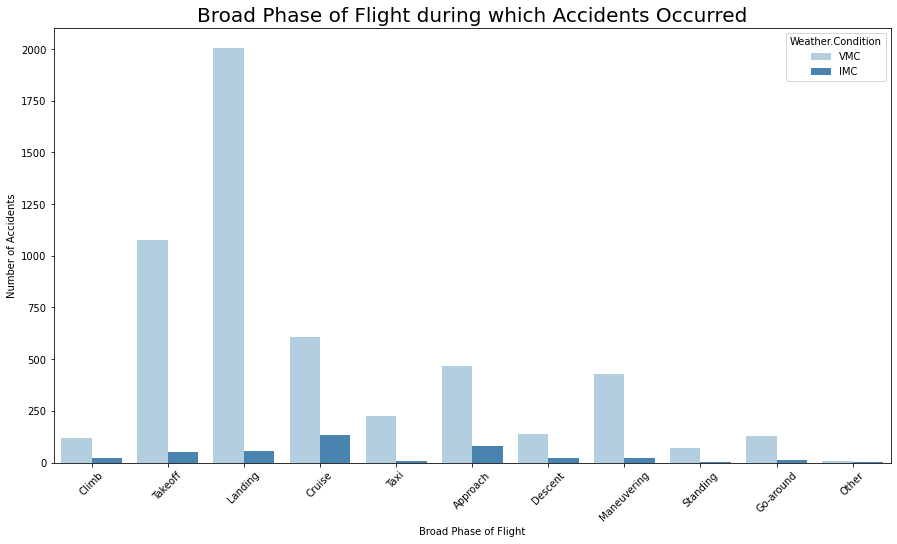

In [31]:
plt.subplots(figsize = (15,8))
ph = sns.countplot(data=df[(df['Broad.phase.of.flight'] != 'Unknown') & (~df['Weather.Condition'].str.lower().str.contains('unk'))], 
                   x='Broad.phase.of.flight', hue='Weather.Condition', linewidth=1, palette='Blues')
plt.xticks(rotation=45)
plt.xlabel("Broad Phase of Flight", size=10)
plt.ylabel("Number of Accidents", size=10)
plt.title("Broad Phase of Flight during which Accidents Occurred", size = 20);

The chart shows that most of the accidents occurred during either landing or take-off phases. Meanwhile, accidents occurred during Cruise and Maneuvering phases only take much smaller shares of the total airplane accidents in this dataset.

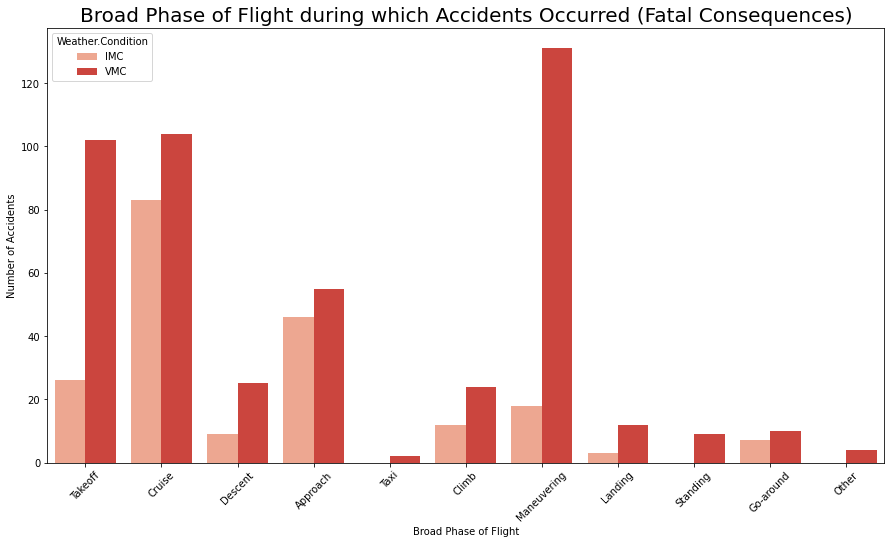

In [32]:
fatal = df[(df['Broad.phase.of.flight'] != 'Unknown') & (df['Total.Fatal.Injuries'] > 0)]
fatal = fatal[~fatal['Weather.Condition'].str.lower().str.contains('unk')]
plt.subplots(figsize = (15,8))
ph = sns.countplot(data=fatal, x='Broad.phase.of.flight', hue='Weather.Condition', linewidth=1, palette='Reds')
plt.xticks(rotation=45)
plt.xlabel("Broad Phase of Flight", size=10)
plt.ylabel("Number of Accidents", size=10)
plt.title("Broad Phase of Flight during which Accidents Occurred (Fatal Consequences)", size = 20);

When considering only fatal accidents, Cruise and Maneuvering phases emerge as two phases that cause many devastating airplane accidents. In good weather condition, most airplane accident occur during Maneuvering phases; meanwhile, Cruise phase mostly witness accidents during bad weather conditions.

My last recommendation to the stakeholders is to have more trainings for pilots with situation involved in Take-off, Landing, Maneuvering and Cruise phases. Moreover, pilots should have more trainings to handle different situations during Cruise phases, particularly in bad weather.  